In [1]:
from torch.utils.data import DataLoader,Dataset
import torch
import torchvision
from torchvision import datasets

In [2]:
train_data = datasets.MNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [3]:
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=True)

In [4]:
x,y = train_data[0]
print(x.shape,y)

torch.Size([1, 28, 28]) 5


In [5]:
class SimpleNN(torch.nn.Module):
  def __init__(self):
    super(SimpleNN,self).__init__()
    self.conv = torch.nn.Conv2d(1,16,2)
    self.conv2 = torch.nn.Conv2d(16,32,2)
    self.relu = torch.nn.ReLU()
    self.pool = torch.nn.MaxPool2d(2)
    self.flatten = torch.nn.Flatten()
    self.fc1 = torch.nn.Linear(1152,32)
    self.fc2 = torch.nn.Linear(32,10)
  def forward(self,x):
    x = self.conv(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.flatten(x)
    x = self.relu(x)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

In [6]:
model = SimpleNN()
epochs = 5
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
correct = 0
total = 0

In [7]:
for epoch in range(epochs):
  running_loss = 0.0
  for i,(input,label) in enumerate(train_loader):
    output = model(input)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss.item()
    _,predicted = torch.max(output.data,1)
    total += label.size(0)
    correct += (predicted == label).sum().item()

  print(f'Epoch: {epoch} Loss: {running_loss}')

print(f'Train Accuracy: {(correct/total)*100}%')

Epoch: 0 Loss: 316.1711287945509
Epoch: 1 Loss: 91.66960371751338
Epoch: 2 Loss: 65.02049482008442
Epoch: 3 Loss: 53.6218324394431
Epoch: 4 Loss: 45.403507528826594
Train Accuracy: 96.309%


In [8]:

correct = 0
total = 0
for i,(input,label) in enumerate(test_loader):
  output = model(input)
  _,predicted = torch.max(output.data,1)
  total += label.size(0)
  correct += (predicted == label).sum().item()

print(f'Test Accuracy: {(correct/total)*100}%')

Test Accuracy: 98.3%


In [9]:
import matplotlib.pyplot as plt
import numpy as np

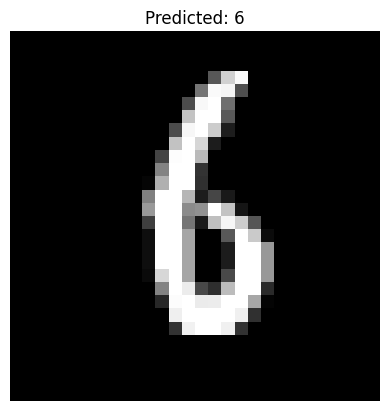

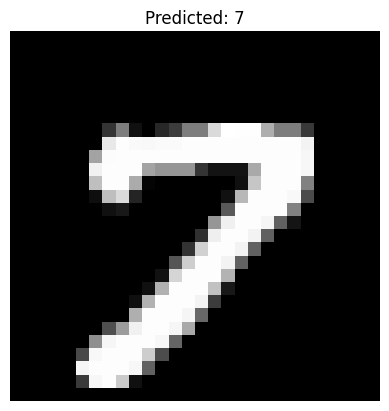

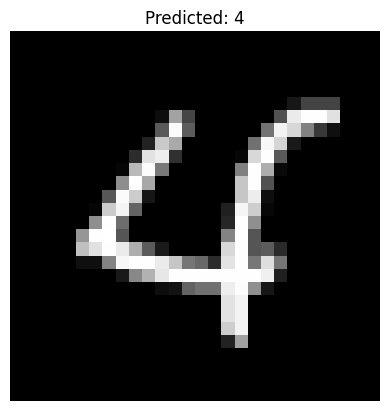

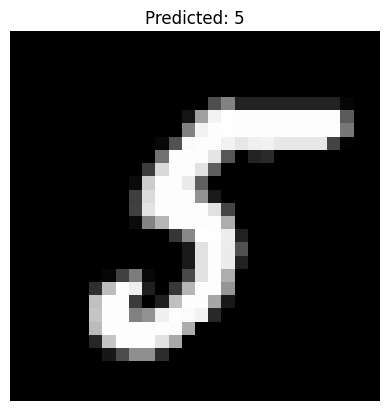

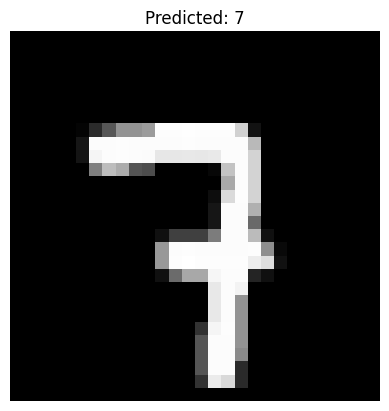

In [10]:
data_iter = iter(train_loader)
images,labels = next(data_iter)

with torch.no_grad():
    output = model(images)
    _,predicted = torch.max(output.data,1)

for j in range(5):
    image = images[j]
    image = image.numpy()
    plt.imshow(image[0], cmap='gray')
    plt.title(f'Predicted: {predicted[j].item()}')
    plt.axis('off')
    plt.show()
